In [2]:
%matplotlib inline
import numpy as np
from qutip import *
from jc_model.Hamiltonian import Hamiltonian
from jc_model.op_collapse import op_collapse
import matplotlib.pyplot as plt
import matplotlib as mpl

def Hamiltonian(omega_a, omega_m, g, n, rwa):
    """
    Mendefinisikan Hamiltonian untuk model Jaynes-Cumming dengan parameter yang sesuai.
    
    Parameter
    ---------
    omega_a : :int/float
            Merupakan ungkapan frekuensi transisi atom
            
    omega_m : :int/float
            Merupakan ungkapan frekuensi meden
    
    g : :int/float
        Merupakan ungkapan parameter kuat interaksi sistem atom-meda
        
    n : :int
        Merupakan ungkapan parameter jumlah N medan
    
    rwa : :bool
        Merupakan parameter RWA.
        True : menggunakan RWA
        False : tidak menggunakan RWA
    
    """
    
    # Mempersiapkan operator
    a = tensor(destroy(n), qeye(2))  #operator a (anhilation)
    sm = tensor(qeye(n), destroy(2)) #operator sigma-minus
    
    # Hamiltonian
    if rwa:
        H = omega_m*a.dag()*a + 0.5*omega_a*commutator(sm.dag(), sm) + g*(a.dag()*sm + a*sm.dag())
    else:
        H = omega_m*a.dag()*a + 0.5*omega_a*commutator(sm.dag(), sm) + g*(a.dag() + a)*(sm + sm.dag())
    return H

In [3]:

wa = 2*np.pi     # frekuensi atom
wc = wa    # frekuensi medan
N = 15           # jumlah n medan
g = 0.05*2*np.pi # kuat interaksi
kappa = 0.00    # cavity dissipation rate
gamma = 0.0
n_th = 0.0     #jumlah rata-rata dari thermal bath excitation
use_rwa = False

# keadaan awal
psi_0 = tensor(basis(N,0), basis(2,0)) # mulai dengan keadaan eksitasi
# waktu
tlist = np.linspace(0,25,101)
# operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Hamiltonian
H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)


In [4]:
c_ops = op_collapse(gamma=gamma, kappa=kappa, a=a, sm=sm, n_th=n_th)



In [5]:
len(tlist)

101

In [6]:
me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, H])

E_list = me_result.expect[1]
n_a = me_result.expect[0]

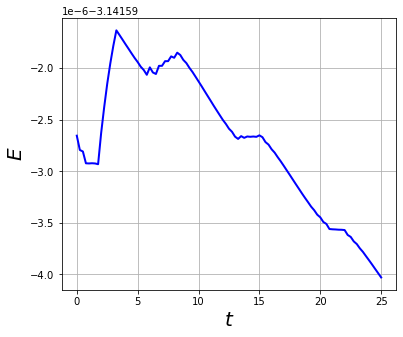

In [7]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6,5))

axes.plot(tlist, E_list, 'b', linewidth=2)
#axes.set(xlim=(0, 25), ylim=(1.6, 3.2))
axes.set_ylabel(r"$E$", fontsize=20)
axes.set_xlabel(r"$t$", fontsize=20)
axes.grid()


Text(0.5, 1.0, 'Vacuum Rabi oscillations')

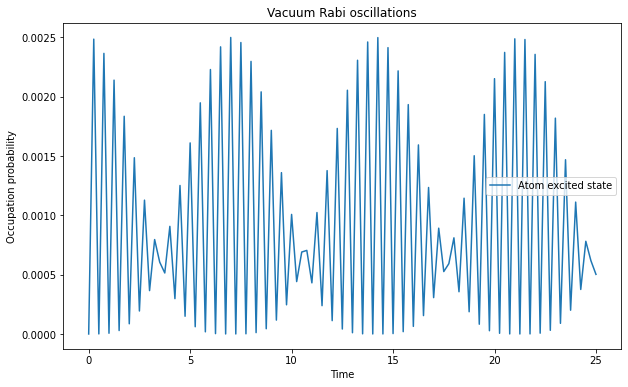

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')